In [9]:
# libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #To adjust the configuration of plots that will be created

# Read the data

df = pd.read_csv(r"C:\Users\lenovo\Documents\DATA SCIENCE\Portfolio\movies.csv")

In [7]:
df.sample(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
4630,Tae Guk Gi: The Brotherhood of War,R,Action,2004,"September 24, 2004 (United States)",8.0,38000.0,Je-kyu Kang,Richard Epcar,Jang Dong-Gun,South Korea,12800000.0,76287982.0,Kang Je-Kyu Film Co. Ltd.,140.0
6827,Our Brand Is Crisis,R,Comedy,2015,"October 30, 2015 (United States)",6.1,21000.0,David Gordon Green,Rachel Boynton,Sandra Bullock,United States,28000000.0,8527658.0,Fortis Films,107.0
4938,Tell No One,Not Rated,Crime,2006,"November 1, 2006 (France)",7.5,52000.0,Guillaume Canet,Guillaume Canet,François Cluzet,France,NaN,33428799.0,Trésor Films,131.0
5519,The Collector,R,Horror,2009,"July 31, 2009 (United States)",6.4,61000.0,Marcus Dunstan,Patrick Melton,Josh Stewart,United States,6000000.0,10234475.0,LD Entertainment,90.0
7017,Love & Friendship,PG,Comedy,2016,"June 3, 2016 (United States)",6.4,24000.0,Whit Stillman,Whit Stillman,Kate Beckinsale,Ireland,3000000.0,21401949.0,Westerly Films,90.0


In [8]:
df.shape 

(7668, 15)

In [13]:
# Check for percentage of missing data

for col in df.columns:
    pct_missing = round(np.mean(df[col].isnull()),1)
    print ('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.3%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [14]:
# Data cleaning

#Data type

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [16]:
df = df.dropna()

In [17]:
# Changing float64 to int64, getting rid of '.0' from the values

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [18]:
df.sample(3)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7008,Monster Trucks,PG,Animation,2016,"January 13, 2017 (United States)",5.7,16000.0,Chris Wedge,Derek Connolly,Lucas Till,Canada,125000000,64493915,Paramount Pictures,104.0
2420,Money for Nothing,R,Comedy,1993,"September 10, 1993 (United States)",5.7,3700.0,Ramón Menéndez,Mark Bowden,John Cusack,United States,11000000,1039824,Permut Presentations,100.0
6108,Safety Not Guaranteed,R,Comedy,2012,"June 15, 2012 (Canada)",7.0,122000.0,Colin Trevorrow,Derek Connolly,Aubrey Plaza,United States,750000,4424699,FilmDistrict,86.0


In [19]:
# 'Year' and 'Relased' year have different values
# Create new column 'yearcorrect'

# Extracting year from released date


df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)
df.sample(3)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5486,Fired Up!,PG-13,Comedy,2009,"February 20, 2009 (United States)",6.1,43000.0,Will Gluck,Will Gluck,Eric Christian Olsen,United States,20000000,18599102,Screen Gems,90.0,2009
5778,Somewhere,R,Comedy,2010,"January 21, 2011 (United States)",6.3,44000.0,Sofia Coppola,Sofia Coppola,Stephen Dorff,United States,7000000,14788642,Focus Features,97.0,2011
4308,Brother Bear,G,Animation,2003,"November 1, 2003 (United States)",6.8,101000.0,Aaron Blaise,Tab Murphy,Joaquin Phoenix,United States,128000000,250397798,Walt Disney Animation Studios,85.0,2003


In [20]:
# Order data by gross revenue

df.sort_values(by=['gross'], inplace = False, ascending = False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500.0,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96.0,2015
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0,1994
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0,2001
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0,1982


In [22]:
# Checking unique values for 'company'

pd.set_option('display.max_rows', None)
df['company'].drop_duplicates().sort_values(ascending = False)

7129                                              thefyzz
5664                                          micro_scope
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
3330                          Zucker Brothers Productions
146                                      Zoetrope Studios
2213                                   Zeta Entertainment
3698                              Zentropa Entertainments
1180                                 Zenith Entertainment
5180                                      Zazen Produções
1321                             Zanuck/Brown Productions
1329                          Zacharias-Buhai Productions
789                             Young Sung Production Co.
5125                           Young Hannibal Productions
5499                                          Yellow Bird
4618          

In [ ]:
# Hypothesis: 
# High correlation of budget with gross: More budget, higher gross
# Famous company have higher bugdet for movies


# budget vs gross

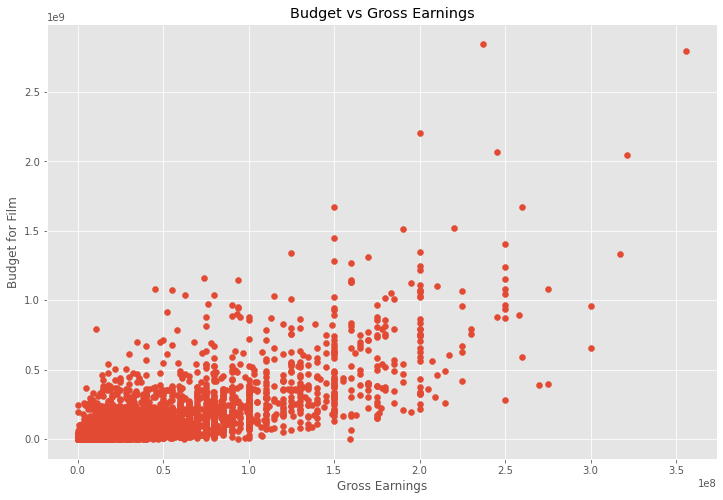

In [23]:
# Scatterplot to compare budget & gross

plt.scatter(x = df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

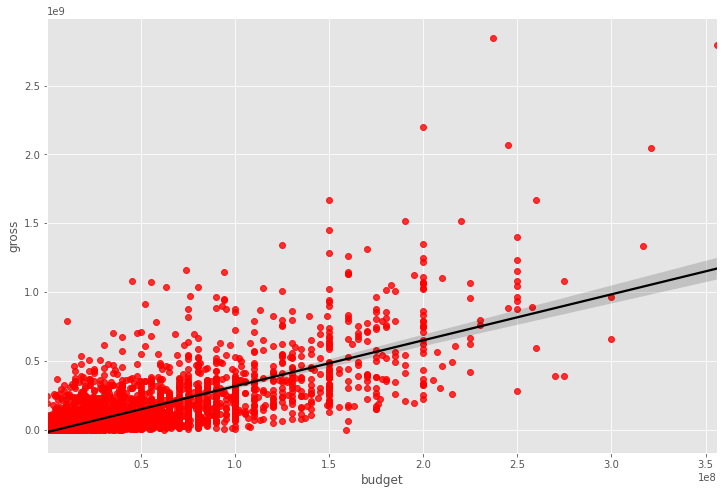

In [25]:
# Regression plot

sns.regplot(x ='budget', y ='gross', data = df, scatter_kws = {"color":'red'}, line_kws={'color': 'black'} )

# The variables are positively correlated

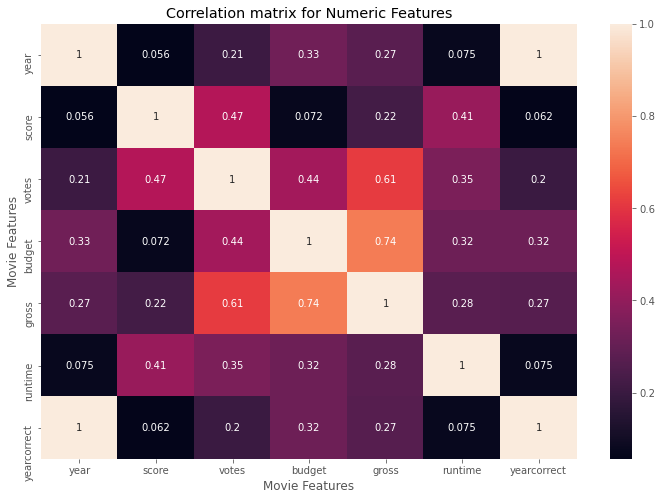

In [28]:
# Correlation matrix

correlation_matrix = df.corr() 

sns.heatmap(correlation_matrix, annot = True) # If annot not written
plt.title('Correlation matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

# Highest correlation: gross & budget
# Second highest correlation: gross & votes

# company vs gross

In [29]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes #to give random numerization
        
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,4692,6,6,1980,1304,8.4,927000.0,1795,2832,699,46,19000000,46998772,1426,146.0,1980
1,3929,6,1,1980,1127,5.8,65000.0,1578,1158,214,47,4500000,58853106,452,104.0,1980
2,3641,4,0,1980,1359,8.7,1200000.0,757,1818,1157,47,18000000,538375067,945,124.0,1980
3,204,4,4,1980,1127,7.7,221000.0,889,1413,1474,47,3500000,83453539,1108,88.0,1980
4,732,6,4,1980,1170,7.3,108000.0,719,351,271,47,6000000,39846344,1083,98.0,1980


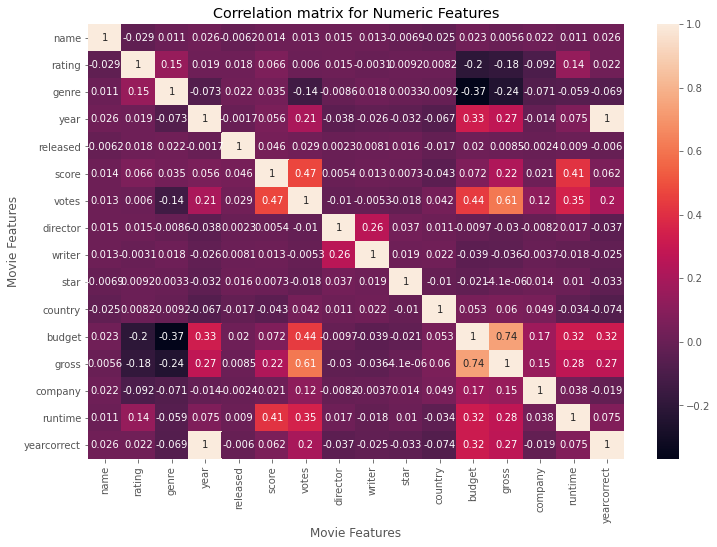

In [31]:
correlation_matrix = df_numerized.corr() 

sns.heatmap(correlation_matrix, annot = True) # If annot not written
plt.title('Correlation matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

Company is weakly correlated to gross
Interestingly, stars also aren't correlated to gross

In [33]:
# To see columns with high corr --> unstacking

corr_mat = df_numerized.corr()

corr_pairs = corr_mat.unstack()

corr_pairs

name         name           1.000000
             rating        -0.029234
             genre          0.010996
             year           0.025542
             released      -0.006152
             score          0.014450
             votes          0.012615
             director       0.015246
             writer         0.012880
             star          -0.006882
             country       -0.025490
             budget         0.023392
             gross          0.005639
             company        0.021697
             runtime        0.010850
             yearcorrect    0.025542
rating       name          -0.029234
             rating         1.000000
             genre          0.147796
             year           0.019499
             released       0.018083
             score          0.065983
             votes          0.006031
             director       0.014656
             writer        -0.003149
             star           0.009196
             country        0.008230
 

In [34]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre        budget        -0.368523
budget       genre         -0.368523
gross        genre         -0.244101
genre        gross         -0.244101
rating       budget        -0.203946
budget       rating        -0.203946
rating       gross         -0.181906
gross        rating        -0.181906
votes        genre         -0.135990
genre        votes         -0.135990
company      rating        -0.092357
rating       company       -0.092357
country      yearcorrect   -0.073569
yearcorrect  country       -0.073569
year         genre         -0.073167
genre        year          -0.073167
             company       -0.071334
company      genre         -0.071334
genre        yearcorrect   -0.069147
yearcorrect  genre         -0.069147
year         country       -0.066748
country      year          -0.066748
genre        runtime       -0.059237
runtime      genre         -0.059237
score        country       -0.043051
country      score         -0.043051
writer       budget        -0.039466
b

In [35]:
# Variables pairs with >0.5 correlation

high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

gross        votes          0.614751
votes        gross          0.614751
gross        budget         0.740247
budget       gross          0.740247
year         yearcorrect    0.998726
yearcorrect  year           0.998726
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

Votes and budget has high corr to gross earnings

Company has low correlation